# Banking Machine Dataset

This dataset is as a result of bank's telemarketing campaign conducted in Portugese. This data is a multivariate dataset with 17 attributes. The purpose of the dataset is to be able to predict if a client will subscribe a term deposit.
For the prediction, we are going to be using a supervised machine learning algorithm in particular a classification method called logistic regression. This method is selected because it is a binary classification, we only have two binary outcomes (True or False), in this case the dataset captures it as Yes/No.¶
In particular we will performing a multi-variate logistic regression on the data since it has several input variables.

### 1.1 Data Sources:

For more information on the attributes in the dataset, and to download the dataset go to the url below: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
Citation:
S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. [bank.zip]

### 1.2 Python Libraries

To develop and execute the logistic regression modelling, we are going to be the using the following libraries:
pandas to load the dataset and manipulate the data.
missingno to check for missing values.
matplotlib.pyplot and IPython for interactive development and to create data visualizations.
sckit-learn as the machine learning library with supporting libraries - NumPy and SciPy.





In [1]:
### machine learning scikit-learn, classes and supporting libraries
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
####from sklearn.metrics import classification_report, confusion_matrix

### data exploration and manipulation
import pandas as pd


### interactive development, plots and visuals
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.compose import ColumnTransformer



In [3]:
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

## 1.3 Import Files and transform data

## Local jupyter notebook

In [4]:
bank = pd.read_csv(r"C:\Users\ijeke\Documents\Datasets\Bank Machine Learning dataset\bank.csv", delimiter= ";")
bank_full = pd.read_csv(r"C:\Users\ijeke\Documents\Datasets\Bank Machine Learning dataset\bank-full.csv", delimiter= ";")

In [5]:
### find out file details

bank_full.info()
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 co

In [6]:
## rename columns
bank.rename(columns={'default':'credit default', 'housing': 'housing loan', 'loan': 'personal loan', 'duration': 'last contact duration', 'contact': 'contact communication type'}, inplace = True)

bank_full.rename(columns={'default':'credit default', 'housing': 'housing loan', 'loan': 'personal loan', 'duration': 'last contact duration', 'contact': 'contact communication type'}, inplace = True)


bank_full.head()

,age,job,marital,education,credit default,balance,housing loan,personal loan,contact communication type,day,month,last contact duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
bank.head()

,age,job,marital,education,credit default,balance,housing loan,personal loan,contact communication type,day,month,last contact duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
## create a list from column names
list(bank_full.columns.values)

['age',
 'job',
 'marital',
 'education',
 'credit default',
 'balance',
 'housing loan',
 'personal loan',
 'contact communication type',
 'day',
 'month',
 'last contact duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [9]:
## Assumed list of output variable (desired target), y is a binary yes/no column it caputres if the client subscribed to a term deposit
dep_variable = list(bank.columns.values[16:]) ## for testing set
display(dep_variable)

['y']

In [10]:
## Assumed list of output variable (desired target), y is a binary yes/no column it caputres if the client subscribed to a term deposit
dep_variableT = list(bank_full.columns.values[16:]) ## for training set
display(dep_variableT)

['y']

In [11]:
## Assumed list of input variables as features
indep_variables = list(bank.columns.values[0:16]) ## for testing set
display(indep_variables)

['age',
 'job',
 'marital',
 'education',
 'credit default',
 'balance',
 'housing loan',
 'personal loan',
 'contact communication type',
 'day',
 'month',
 'last contact duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [12]:
## Assumed list of input variables as features
indep_variablesT = list(bank_full.columns.values[0:16]) ## for training set
display(indep_variablesT)


['age',
 'job',
 'marital',
 'education',
 'credit default',
 'balance',
 'housing loan',
 'personal loan',
 'contact communication type',
 'day',
 'month',
 'last contact duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [13]:
### split dataset into features(x) and desired target(y) - test set

y = bank[dep_variable]  
x = bank[indep_variables]
print(x)
print(y)


      age            job  marital  education credit default  balance  \
0      30     unemployed  married    primary             no     1787   
1      33       services  married  secondary             no     4789   
2      35     management   single   tertiary             no     1350   
3      30     management  married   tertiary             no     1476   
4      59    blue-collar  married  secondary             no        0   
...   ...            ...      ...        ...            ...      ...   
4516   33       services  married  secondary             no     -333   
4517   57  self-employed  married   tertiary            yes    -3313   
4518   57     technician  married  secondary             no      295   
4519   28    blue-collar  married  secondary             no     1137   
4520   44   entrepreneur   single   tertiary             no     1136   

     housing loan personal loan contact communication type  day month  \
0              no            no                   cellular   1

In [14]:
### split dataset into features(y) and desired target(x) - training set

yT = bank_full[dep_variableT]
xT = bank_full[indep_variablesT]
print(xT)
print(yT)

       age           job   marital  education credit default  balance  \
0       58    management   married   tertiary             no     2143   
1       44    technician    single  secondary             no       29   
2       33  entrepreneur   married  secondary             no        2   
3       47   blue-collar   married    unknown             no     1506   
4       33       unknown    single    unknown             no        1   
...    ...           ...       ...        ...            ...      ...   
45206   51    technician   married   tertiary             no      825   
45207   71       retired  divorced    primary             no     1729   
45208   72       retired   married  secondary             no     5715   
45209   57   blue-collar   married  secondary             no      668   
45210   37  entrepreneur   married  secondary             no     2971   

      housing loan personal loan contact communication type  day month  \
0              yes            no                 

### 1.3.1 Create Dummy Data for values that are not numerical - test set



In [15]:
# check unique values

y['y'].unique()


array(['no', 'yes'], dtype=object)

In [16]:
## create dummy values for y
y_test = pd.get_dummies(data=y, drop_first=True)
print (y_test)

      y_yes
0         0
1         0
2         0
3         0
4         0
...     ...
4516      0
4517      0
4518      0
4519      0
4520      0

[4521 rows x 1 columns]


In [17]:
y_test['y_yes'].unique()

array([0, 1], dtype=uint8)

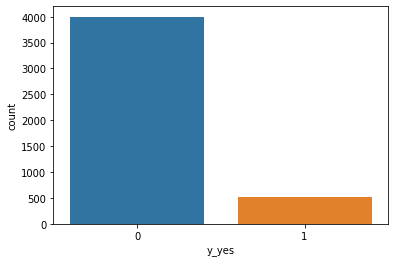

In [18]:
## visualize it

y_test['y_yes'].value_counts()
sns.countplot(x='y_yes', data=y_test)

### Check column datatypes

In [19]:
## there are only datatypes in the dataset, integers and object, select dtype integer
x.select_dtypes(include=['int64'])

,age,balance,day,last contact duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [20]:
## there are only datatypes in the dataset, integers and object, select dtype object
x.select_dtypes(include=['object'])

,job,marital,education,credit default,housing loan,personal loan,contact communication type,month,poutcome
0,unemployed,married,primary,no,no,no,cellular,oct,unknown
1,services,married,secondary,no,yes,yes,cellular,may,failure
2,management,single,tertiary,no,yes,no,cellular,apr,failure
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown
4518,technician,married,secondary,no,no,no,cellular,aug,unknown
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other


### 1.3.2 Create dummy values for training set



In [21]:
# check unique values

yT['y'].unique()

array(['no', 'yes'], dtype=object)

In [22]:
## create dummy values for yT
y_train = pd.get_dummies(data=yT, drop_first=True)
print (y_train)

       y_yes
0          0
1          0
2          0
3          0
4          0
...      ...
45206      1
45207      1
45208      1
45209      0
45210      0

[45211 rows x 1 columns]


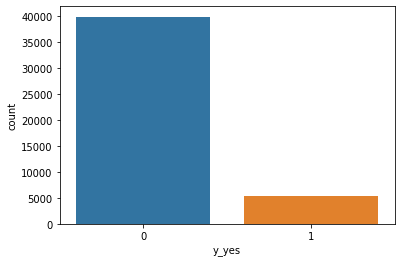

In [23]:
## visualize it

y_train['y_yes'].value_counts()
sns.countplot(x='y_yes', data=y_train)

In [24]:
 xT.select_dtypes(include=['object'])



,job,marital,education,credit default,housing loan,personal loan,contact communication type,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


In [25]:


xT.select_dtypes(include=['int64'])



,age,balance,day,last contact duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


## 1.4 Create Pipeline Model


In [26]:
## create the preprocessing pipelines for both numeric and the object data type
numeric_features = list(xT.select_dtypes(include=['int64']))

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = list(xT.select_dtypes(include=['object']))

categorical_transformer = Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])

In [27]:
## Append classifier to preprocessing pipeline

clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0))])



In [28]:
clf.fit(xT, y_train.values.ravel())

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['age', 'balance', 'day',
                                                   'last contact duration',
                                     

In [29]:
print('modelscore: %.3f' % clf.score(x, y_test))

modelscore: 0.902


In [30]:
## predict test instances
y_pred =  clf.predict(x)

## calculate scores
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9022340190223402
Precision: 0.6468401486988847
Recall: 0.33397312859884837


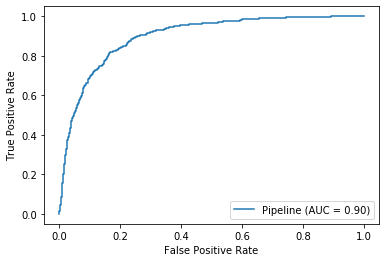

In [31]:
## plot true positive rate vs false positive rate

from sklearn.metrics import plot_roc_curve

clf_disp = plot_roc_curve(clf, x, y_test)
plt.show()